(array([  1.,   0.,   0.,   1.,   5.,  32., 105.,  76.,  23.,   9.]),
 array([-0.23287674, -0.19949517, -0.16611361, -0.13273204, -0.09935047,
        -0.06596891, -0.03258734,  0.00079422,  0.03417579,  0.06755736,
         0.10093892]),
 <BarContainer object of 10 artists>)

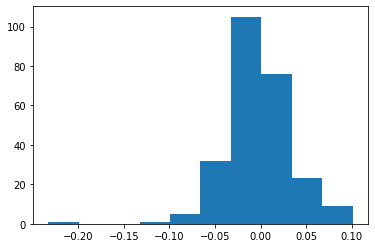

In [1]:
import http.client
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline
import json
conn = http.client.HTTPSConnection("apidojo-yahoo-finance-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "267f25b152mshb04baccb77d9f0bp1cf6a9jsn443dbece0af8",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
}

conn.request(
    "GET", "/stock/v3/get-historical-data?symbol=AMRN&region=US", headers=headers)

res = conn.getresponse()
data = res.read()


priceObj = data.decode("utf-8")
# parse x:
y = json.loads(priceObj)


priceList = y["prices"]
arr = []
for i in priceList:
    arr.append((i["close"]-i["open"])/i["open"])
mu = 80
sigma = 7
x = np.random.normal(mu, sigma, size=200)
plt.hist(arr)